### 데이터와 행렬

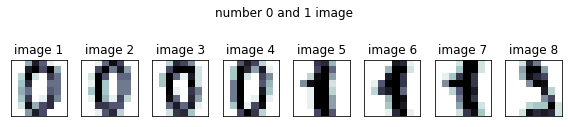

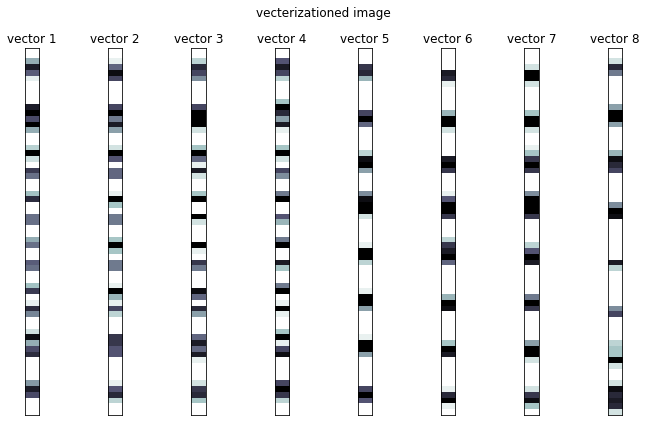

In [2]:
# 연습문제
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
samples=[0,10,20,30,1,11,21,31]
d=[]
for i in range(8):
    d.append(digits.images[samples[i]])
plt.figure(figsize=(8,2))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(d[i],interpolation='nearest',cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('image {}'.format(i+1))
plt.suptitle('number 0 and 1 image')
plt.tight_layout()
plt.show()

v=[]
for i in range(8):
    v.append(d[i].reshape(64,-1))
plt.figure(figsize=(10,6))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(v[i],aspect=0.4,
                interpolation='nearest',cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('vector {}'.format(i+1))
plt.suptitle('vecterizationed image')
plt.tight_layout()
plt.show()

In [3]:
# 데이터 분석에서의 관례
## 하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 열로
## 복수의 데이터 집합을 행렬로 나타낼 때는 행으로 표기

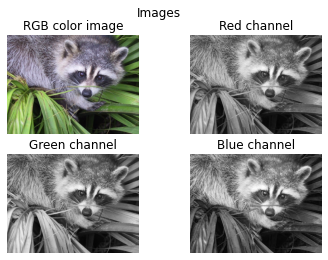

In [4]:
# 텐서
## 같은 크기의 행렬이 여러 개 같이 묶여 있는 것
from scipy import misc
img_rgb=misc.face()
plt.subplot(2,2,1)
plt.imshow(img_rgb,cmap=plt.cm.gray)
plt.axis('off')
plt.title('RGB color image')

plt.subplot(2,2,2)
plt.imshow(img_rgb[:,:,0],cmap=plt.cm.gray)
plt.axis('off')
plt.title('Red channel')

plt.subplot(2,2,3)
plt.imshow(img_rgb[:,:,1],cmap=plt.cm.gray)
plt.axis('off')
plt.title('Green channel')

plt.subplot(2,2,4)
plt.imshow(img_rgb[:,:,2],cmap=plt.cm.gray)
plt.axis('off')
plt.title('Blue channel')

plt.suptitle('Images')
plt.show()


### 벡터와 행렬의 연산

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 벡터/행렬의 덧셈과 뺄셈
x=np.array([10,11,12,13,14])
y=np.array([0,1,2,3,4])
x+y
x-y
np.array([[5,6],[7,8]])+np.array([[10,20],[30,40]]) - \
    np.array([[1,2],[3,4]])

# 스칼라와 벡터/행렬의 곱셈 - 그냥 곱하면 됨
x**3
np.array([[1,2],[3,4]])*2

# 브로드캐스팅
# 원래 덧셈뺄셈은 크기가 같은 두 벡터만 가능하나 스칼라의 경우는 벡터 변환 연산이 허용됨
np.array([10,11,12])-10

# 보통 데이터 분석에서 평균제거벡터를 사용하는 경우가 많아 이런 경우에 사용됨

# 선형조합 - 스칼라값을 곱한 후 더하거나 빼는것 말 그대로 간단해서 패스

array([0, 1, 2])

In [6]:
# 벡터와 벡터의 곱셈(내적) -dot() | @
# 내적을 위한 조건 x * y 일때 x의 열과 y의 행의 크기가 같아야함 | 행 벡터 * 열벡터의 형태여야 함
np.array([1,2,3]).T*np.array([1,2,3]) # 사실은 열*행 이여도 상관 없기는 함
x.T @ y

# 내적을 사용한 분석
# 가중합
x=np.array([1,2,3]) # 데이터
y=np.array([2,3,4]) # 가중치
x @ y.T # 가중합

# 가중평균 - 가중합을 전체 가중치 값으로 나눈 값
# 사실상 그냥 mean() 써도 무방함

20

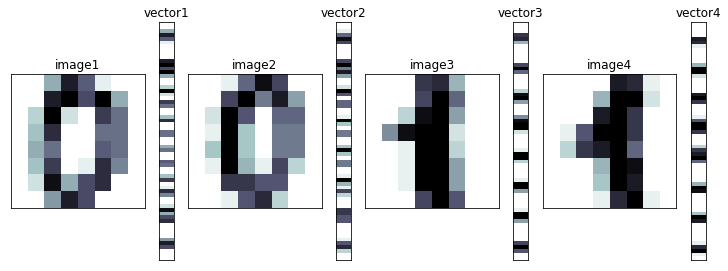

(1866.0, 2479.0)

In [7]:
# 유사도 - 벡터의 곱셈으로 두 벡터 간의 유사도를 계산
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64,1)
v2 = d2.reshape(64,1)
v3 = d3.reshape(64,1)
v4 = d4.reshape(64,1)
plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(1,8,height_ratios=[1],
                        width_ratios=[9,1,9,1,9,1,9,1])
for i in range(4):
    plt.subplot(gs[2*i])
    plt.imshow(eval('d'+str(i+1)),aspect=1, interpolation='nearest',cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('image{}'.format(i+1))
    plt.subplot(gs[2*i+1])
    plt.imshow(eval('v'+str(i+1)), aspect=0.25, interpolation='nearest',cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('vector{}'.format(i+1))
plt.tight_layout()
plt.show()

# 0 이미지와 0 이미지 | 1 이미지와 1 이미지의 내적값
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]
# 교차 내적값
(v1.T @ v3)[0][0], (v2.T @ v4)[0][0] # 위의 값보다 훨씬 낮은 수치를 보임

In [8]:
# 선형회귀 모형
# y=w1x1+w2x2+...wnxn = w.T*x 의 형태로 나타낼 수 있음
# 이렇게 간단한 경우는 사실상 가중합과 같은 모습을 보임
# w = 가중치 벡터
# 단점 - 비선형적인 현실 세계의 데이터를 잘 예측하지 못할 수 있음

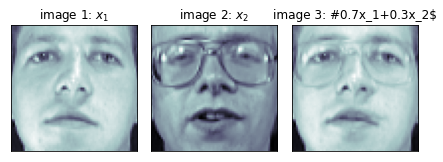

In [9]:
# 행렬과 행렬의 곱, 교환법칙 성립x 분배법칙 성립o, 곱셈의 연결, 항등행렬의 곱셈, 행렬과 벡터의 곱,
# 열 벡터의 선형조합 까지 전부 스킵 너무 기본 내용
# 벡터의 선형조합 예시 - 모핑
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()
f,ax=plt.subplots(1,3)
ax[0].imshow(faces.images[6],cmap=plt.cm.bone)
ax[0].grid(False); ax[0].set_xticks([]); ax[0].set_yticks([])
ax[0].set_title('image 1: $x_1$')

ax[1].imshow(faces.images[10],cmap=plt.cm.bone)
ax[1].grid(False); ax[1].set_xticks([]); ax[1].set_yticks([])
ax[1].set_title('image 2: $x_2$')

newface=0.7*faces.images[6]+0.3*faces.images[10]
ax[2].imshow(newface,cmap=plt.cm.bone)
ax[2].grid(False); ax[2].set_xticks([]); ax[2].set_yticks([])
ax[2].set_title('image 3: #0.7x_1+0.3x_2$')
plt.tight_layout()
plt.show()

In [10]:
# 잔차  - 예측치와 실젯값의 차이
# '$e_i = y_i - ^y_i = y_i - w.T*x_i$ = y-Xw

# 잔차 제곱합 = RSS
# e.T*e

In [11]:
# 이차 형식 - 행벡터*정방행렬*열벡터의 형식으로 이루어진 것
# w.T*X.T*X*w 의 형식에서 X.T*X는 정방행렬이므로 w.T*A*w 로 나타낼 수 있음

# 부분행렬도 곱에서 다 나오는 내용이라 스킵

### 행렬의 성질

In [12]:
# 정부호와 준정부호
# 영벡터가 아닌 모든 벡터 x에 대해 x.T*A*x > 0 이면 A를 양의 정부호,
# x.T*A*x >= 0 이면 양의 준정부호 라고 함

In [13]:
# 행렬 norm - 행렬 A에 의해 식으로 정의되는 숫자
# ∥A∥p=(∑i=1N∑j=1M|aij|**p)**(1/p) - p는 보통 1,2,infinity 를 쓰는데 없으면 2쓴다 생각
# 정의상 놈은 항상 >= 0 이다
# 행렬에 적용되니 벡터에도 적용됨 벡터의 경우 벡터의 놈의 제곱 == 벡터의 제곱합 임
# ∥x∥**2=∑i=1N x**2_i=x.T*x
# np.linalg.norm(x)으로 행렬의 놈 계산 가능

# norm의 성질
# 놈의 값은 0이상이다. 영행렬일 때만 놈의 값이 0이 된다. ∥A∥≥0
# 행렬에 스칼라를 곱하면 놈의 값도 그 스칼라의 절대값을 곱한 것과 같다. ∥αA∥=|α|∥A∥
# 행렬의 합의 놈은 각 행렬의 놈의 합보다 작거나 같다. ∥A+B∥≤∥A∥+∥B∥
# 정방행렬의 곱의 놈은 각 정방행렬의 놈의 곱보다 작거나 같다. ∥AB∥≤∥A∥∥B∥

import numpy as np
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
np.linalg.norm(a[0])**2+np.linalg.norm(a[1])**2+np.linalg.norm(a[2])**2
# 행렬의 놈의 제곱은 그 행렬의 행벡터의 놈의 제곱합 혹은 열벡터의 놈의 제곱합과 같다

285.0

In [14]:
# 대각합(trace) - 정방행렬에 대해서만 정의되며 대각원소의 합이다

# 대각합의 성질 ABC는 행렬 c는 스칼라
# 스칼라를 곱하면 대각합은 스칼라와 원래의 대각합의 곱이다. tr(cA)=ctr(A)
# 전치연산을 해도 대각합이 달라지지 않는다. tr(AT)=tr(A)
# 두 행렬의 합의 대각합은 두 행렬의 대각합의 합이다. tr(A+B)=tr(A)+tr(B)
# 두 행렬의 곱의 대각합은 행렬의 순서를 바꾸어도 달라지지 않는다. tr(AB)=tr(BA)
# 세 행렬의 곱의 대각합은 다음과 같이 순서를 순환시켜도 달라지지 않는다. 
# tr(ABC)=tr(BCA)=tr(CAB)
# 마지막 식은 곱셈에서 순서가 바뀌어도 대각합이 같다는 것을 이용하여 증명할 수 있다. 
# tr((AB)C)=tr(C(AB))=tr((CA)B)=tr(B(CA))
# 트레이스 공식 x.TAx=tr(x.TAx)=tr(Axx.T)=tr(xx.TA)
# np.trace(x)로 대각합 계산가능
# ∥A∥**2=tr(A.T*A) 도 성립함

In [15]:
# 행렬식 - 정방행렬 A의 행렬식 == det(A)
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
np.linalg.det(a)
# 행렬의 크기가 1x1일때는 그 자체가 행렬식 값이 됨

# 행렬식의 일반식
# det(A)=∑i=1~N {(−1)**(i+j_0)M_(i,j_0)}a_(i,j_0) 혹은
# det(A)=∑i=1~N {(−1)**(i_0+j)M_(i_0,j)}a_(i_0,j)
# j_0는 임시로 지정한 열을 의미 | M은 i,j행열을 제외한 나머지 행열을 의미
# -1**(i_0+j) * M_(i_0,j)를 여인수라고 하며 C_(i,j)로 표기

# 행렬식의 성질
# 전치 행렬의 행렬식은 원래의 행렬의 행렬식과 같다. det(A.T)=det(A)
# 항등 행렬의 행렬식은 1이다. det(I)=1
# 두 행렬의 곱의 행렬식은 각 행렬의 행렬식의 곱과 같다. det(AB)=det(A)det(B)
# 역행렬 A**−1은 원래의 행렬 A와 다음 관계를 만족하는 정방행렬을 말한다. 
#   I는 항등 행렬(identity matrix)이다. A**−1*A=A*A**−1=I
# 역행렬의 행렬식은 원래의 행렬의 행렬식의 역수와 같다. det(A**−1)=1/det(A)
# det(A)det(A**−1)=detI=1



0.0

### 선형 연립방정식과 역행렬

In [16]:
# 선형 연립방정식 - 복수의 미지수를 포함하는 복수의 선형 방정식
# a1x1 + a2x2 + ... + anxn = b1 이면 Ax=b로 표현가능(A-계수행렬,x-미지수벡터,b-상수벡터)
# 상수면 x=b/A로 쉽지만 행렬은 나눗셈이 정의되지 않으므로 역행렬을 사용한다

# 역행렬 (A의 역행렬 A**-1)
# 원래의 행렬 A와 (A**-1)*A = A*(A**-1) = I 를 만족하는 행렬 - 있을수도 있고, 없을수도 있음
# 역행렬이 있는 행렬 = 가역행렬,정칙행렬,비특이행렬 | 역행렬이 없는 행렬 = 비가역행렬,특이행렬
#   대각행렬의 역행렬은 대각성분의 역수로 이루어진 대각행렬과 같음

# 역행렬의 성질
#   전치행렬의 역행렬은 역행렬의 전치행렬과 같다. (A.T)**−1=(A**−1)T
#   정방행렬의 곱의 역행렬은 다음과 같은 성질을 가짐
#       (AB)**−1=(B**−1)(A**−1)   (ABC)**−1=(C**−1)(B**−1)(A**−1)  - 순서가 바뀜

# 역행렬의 계산
# A**-1 = C.T/det(A)  - 여기서 C는 여인수행렬, C.T는 수반행렬이며 adj(A)와 같다
# C_(i,j) = -1**(i+j) * M_(i,j)

# 역행렬에 대한 정리 - 여기서 A는 정방행렬임
# 셔먼 모리슨 공식
# (A+u*v.T)**−1 = (A**-1) - ((A**-1)*u*v.T*(A**-1)/1+u.T*(A**-1)*U)
# 우드베리 공식
# (A+UCV)**-1 = (A**-1)-(A**-1)U(((C**-1)+V(A**-1)U)**-1)V(A**-1) 존나 복잡하네
# 분할행렬의 역행렬
# 너무 복잡해서 패스 책에 적어놓겠음

# 넘파이를 사용한 역행렬 계산
A=np.array([[1,1,0],[0,1,1],[1,1,1]])
Aniv=np.linalg.inv(A)
Aniv

# 역행렬과 선형 연립방정식의 해 A:행렬,x:미지수벡터,b:상수벡터 
#       - 이는 선형 예측모형의 가중치벡터(미지수벡터)를 구하는데도 사용됨
# Ax=b > A**-1*Ax=A**-1*b > Ix=A**-1b=x 로 미지수벡터 x를 구할 수 있음
# x, resid, rank, s =np.linalg.lstsq(A,b) 
# 최소자승문제의 답 x,. 잔차제곱합(rss), 랭크, 특잇값 반환

array([[ 0., -1.,  1.],
       [ 1.,  1., -1.],
       [-1.,  0.,  1.]])

In [17]:
# 미지수의 수와 방정식의 수 - 만약 미지수의 수와 방정식의 수가 다르다면?
# 같은경우는 패스 앞에서 많이 함
# 방정식 수 < 미지수의 수 - 해가 무수히 많을 수 있음
# 방정식 수 > 미지수의 수 - 해가 없을 수 있음 - 보통 선형 예측모형을 구할때 이런경우가 많음
# 이런 경우에는 가중치벡터를 구할 수 없을 수 있음

In [18]:
# 최소자승문제 - 선형 연립방정식의 해가 존재하지 않는다면?
# 그냥 대충 제일 잘 맞는걸로 넣음 ㅋㅋ 존나 어이없네 
# 좌변(예측값)과 우변(목표값)의 차이를 최소화하는 값을 사용
# e = Ax-b = 잔차
# 잔차가 벡터이므로 최소자승문제는 벡터의 놈을 최소화함 - 놈의 최소화 = 놈의 제곱을 최소화
# 잔차가 벡터이기에 잔차제곱합이 놈의 제곱이 됨
# e.T*e=e**2=(Ax-b).T*(Ax-b) = argmin e.T*e
# 위의 lstsq를 사용함.
# 대충의 진행방식
# Ax ~ b(유사하다는 뜻) > A.T*Ax ~ A.T*b > ((A.T*A)**-1)*A.T*Ax ~ ((A.T*A)**-1)A.T*b
# x=((A.TA)**-1)*A.T*b - 여기서 ((A.TA)**-1)*A.T를 A의 의사역행렬 이라하며 A**+로 표기
# x=(A**+)*b

In [19]:
A=np.array([[1,1,0],[0,1,1],[1,1,1],[1,1,2]])
b=np.array([[2],[2],[3],[4.1]])
x,resid,rank,s=np.linalg.lstsq(A,b)
x

C:\Users\user\AppData\Local\Temp\ipykernel_21500\65667999.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x,resid,rank,s=np.linalg.lstsq(A,b)


array([[1.03333333],
       [0.95      ],
       [1.05      ]])

### 선형대수와 해석기하의 기초

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


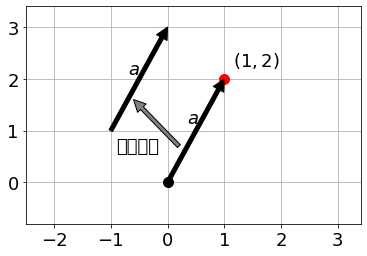

In [20]:
# 벡터의 기하학적 의미
# N차원 벡터 a는 N차원 공간에서 벡터 a값으로 표시되는 점 혹은 원점과 점을 연결한 화살표
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',size=18) # 그림 폰트크기 18로 고정
gray={'facecolor':'gray'}
black={'facecolor':'black'}
red={'facecolor':'red'}
green={'facecolor':'green'}
blue={'facecolor':'blue'}
a=np.array([1,2])
plt.plot(0,0,'ko',ms=10)
plt.plot(a[0],a[1],'ro',ms=10)
# 화살표 지정 - annotate('넣을 텍스트',xy=[끝점],xytext=(시작점),arrowprops=색상)
plt.annotate('',xy=[-0.6,1.6],xytext=(0.2,0.7),arrowprops=gray)
plt.annotate('',xy=a,xytext=(0,0),arrowprops=black)
plt.annotate('',xy=a+[-1,1],xytext=(-1,1),arrowprops=black)
# plt.text(x,y,'넣을 텍스트')
plt.text(0.35,1.15,'$a$')
plt.text(1.15,2.25,'$(1,2)$')
plt.text(-0.7,2.1,'$a$')
plt.text(-0.9,0.6,'평행이동')
plt.xticks(np.arange(-2,4))
plt.yticks(np.arange(-1,4))
plt.xlim(-2.5,3.4)
plt.ylim(-0.8,3.4)
plt.grid(True)
plt.show()

# 벡터의 길이
# norm으로 정의함. a.T * a = 벡터제곱합 - np.linalg.norm(a)

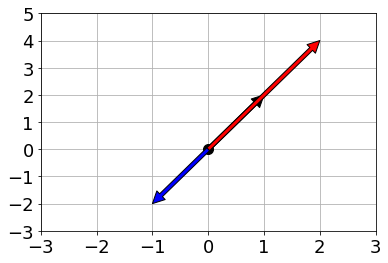

In [21]:
# 스칼라와 벡터의 곱 - 방향은 그대로 실수 크기만큼 곱으로 커짐
a=np.array([1,2])
b=2*a
c=-a
plt.plot(0,0,'ko',ms=10)
plt.annotate('',xy=a,xytext=(0,0),arrowprops=black)
plt.annotate('',xy=b,xytext=(0,0),arrowprops=red)
plt.annotate('',xy=c,xytext=(0,0),arrowprops=blue)
plt.xticks(np.arange(-5,6))
plt.yticks(np.arange(-5,6))
plt.xlim(-3,3)
plt.ylim(-3,5)
plt.grid(True)
plt.show() # 텍스트 설정은 귀찮아서 안함

In [22]:
# 단위벡터 - 길이가 1인 벡터. x/norm(x) 는 단위벡터가 된다.
a=np.array([1,0])
b=np.array([0,1])
c=np.array([1/np.sqrt(2),1/np.sqrt(2)]) # sqrt() 제곱근 계산
np.linalg.norm(a),np.linalg.norm(b),np.linalg.norm(c)

# 대충 화살표 나타내는 법 알았으니 지금부터는 이론만 사용

# 벡터의 합 - 두 벡터를 이웃하는 변으로 가지는 평행사변형의 대각선 벡터가 됨

# 벡터의 선형조합 - 여러개의 벡터를 스칼라곱 후 더한 것
# c1x1+c2x2+...+cnxn | c는 스칼라계수, x는 벡터

# 벡터의 차 - b-a는 벡터 b가 가르키는 점으로부터 벡터 a가 가르키는 점을 연결하는 벡터
# word2vec 단어를 벡터로 표현하는 방법 나중에 인공신경망에서 배움

(1.0, 1.0, 0.9999999999999999)

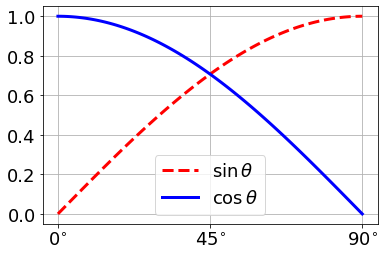

In [23]:
# 유클리드 거리 - 두 벡터가 가리키는 점 사이의 거리 = 벡터의 차의 길이 이므로 norm(a-b)
# norm(a-b) = sqrt(∑(a_i - b_i)**2) = sqrt(norm(a)**2 + norm(b)**2 -2a.Tb)

# 벡터의 내적과 삼각함수 a.Tb = norm(a)norm(b)cosθ
# 삼각함수는 직각삼각형에서 정의됨 sinθ = 높이/빗변 | cosθ = 밑변/빗변 (θ는 각도)
x=np.linspace(0,np.pi/2,100)
y1=np.sin(x)
y2=np.cos(x)
plt.plot(x,y1,'r--',lw=3,label=r'$\sin\theta$')
plt.plot(x,y2,'b-',lw=3,label=r'$\cos\theta$')
plt.legend()
plt.xticks([0,np.pi/4,np.pi/2],[r'$0^{\circ}$',r'$45^{\circ}$',r'$90^{\circ}$'])
plt.grid(True)
plt.show()
# sinθ는 θ가 90도에 가까울수록 1, 0도에 가까울수록 0에 수렴
# cosθ는 0도에 가까울수록 1, 90도에 가까울수록 0

# 직교 - 두 벡터 a와 b가 이루는 각이 90도이면 직교라 하며 a⊥b 로 표시
# cos90도 = 0이므로 직교인 벡터의 내적은 0이됨

# 정규직교 - 두 단위 벡터가 서로 직교할때

# 코사인 유사도 - 두 벡터의 방향이 비슷할수록 벡터가 비슷하다 간주하여
#                두 벡터 사이의 각의 코사인값을 코사인 유사도라 함
# cosine similarity = cosθ = (x.T*y)/(norm(x)*norm(y))
# cosine distance = 1 - cosθ

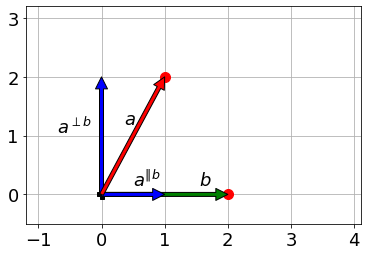

In [24]:
# 투영성분과 직교성분
# 벡터 a를 벡터 b에 직교/평행하는 성분으로 분해. 평행성분=투영성분 , 직교는 직교성분
# a**(∥b) - 투영성분 , a**(⊥b) - 직교성분
# 투영성분의 길이 = ∥a∥cosθ = a.Tb/∥b∥ = b.Ta/∥b∥ > b가 단위벡터면 내적과 같음
# 투영성분 벡터 = (a.Tb/∥b)*(b/∥b∥)
# 직교성분 벡터 = a-a**(∥b) = a- 투영성분벡터

a = np.array([1, 2])
b = np.array([2, 0])
a2 = (a @ b) / np.linalg.norm(b) * np.array([1, 0])
a1 = a - a2
plt.annotate('', xy=b, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=a2, xytext=(0, 0), arrowprops=blue)
plt.annotate('', xy=a1, xytext=(0, 0), arrowprops=blue)
plt.annotate('', xy=a, xytext=(0, 0), arrowprops=red)
plt.plot(0, 0, 'kP', ms=10)
plt.plot(a[0], a[1], 'ro', ms=10)
plt.plot(b[0], b[1], 'ro', ms=10)
plt.text(0.35, 1.2, "$a$")
plt.text(1.55, 0.15, "$b$")
plt.text(-0.7, 1.05, "$a^{\perp b}$")
plt.text(0.50, 0.15, "$a^{\Vert b}$")
plt.xticks(np.arange(-10, 10))
plt.yticks(np.arange(-10, 10))
plt.xlim(-1.2, 4.1)
plt.ylim(-0.5, 3.2)
plt.grid(True)
plt.show()

# 추가 내용
# 원점을 지나는 직선의 방향을 나타내는 단위벡터 v, 직선 위에 있지 않은 점 x일때
# x와 직선의 거리의 제곱 = ∥x∥**2 − (xTv)**2  해보니까 맞음 v가 단위벡터인 점을 이용하면 쉬움

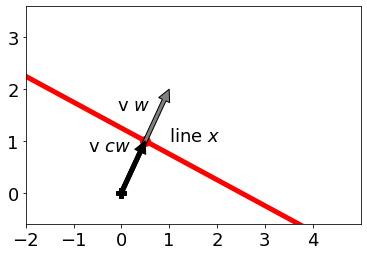

In [25]:
# 직선의 방정식 - 원점에서 출발한 벡터 w의 점을 지나면서 수직인 직선의 방정식 구하기
# x를 두 조건을 만족하는 직선 상의 임의의 점을 가르키는 벡터라고 놓으면 x-w는 w와 직교함
# 따라서 w.T(x-w)=0 을 만족. = w.Tx−w.Tw = w.Tx−∥w∥**2 = 0 - 원점과 직선사이 거리 = ∥w∥ = w.Tx
# 만약 w=np.array([[1],[2]])이면 ∥w∥**2 = 5 이므로 w.Tx=5 가 성립
# x_1+2x_2 =5 가 직선의 방정식이 됨
# 단순히 수직하기만 한 직선의 방정식은 w대신 cw를 쓰면 됨
#   이 경우 직선과 원점사이의 거리는 c∥w∥가 됨 = w.Tx/∥w∥
w = np.array([1, 2])
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=0.5 * w, xytext=(0, 0), arrowprops=black)
plt.plot(0, 0, 'kP', ms=10)
plt.plot(0.5 * w[0], 0.5 * w[1], 'ro', ms=10)
plt.plot([-2, 5], [2.25, -1.25], 'r-', lw=5)
plt.text(-0.7, 0.8, "v $cw$")
plt.text(-0.1, 1.6, "v $w$")
plt.text(1, 1, "line $x$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 5))
plt.xlim(-2, 5)
plt.ylim(-0.6, 3.6)
plt.show()

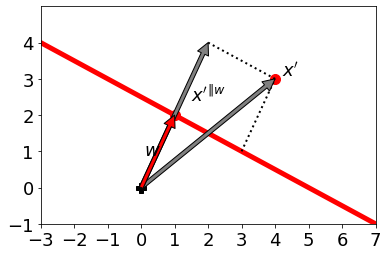

In [26]:
# 직선과 점의 거리 - 직선 w.Tx - ∥w∥**2=0 과 이 직선 위에 있지 않은 점 y사이의 거리
# 쉽게 말해 w에 투영성분 벡터인 y**∥w 에서 ∥w∥을 빼면 직선으로 부터의 거리가 나옴
w = np.array([1, 2])
x1 = np.array([4, 3])
x2 = np.array([1, 2]) * 2
plt.annotate('', xy=x1, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=x2, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=red)
plt.plot(0, 0, 'kP', ms=10)
plt.plot(w[0], w[1], 'ro', ms=10)
plt.plot(x1[0], x1[1], 'ro', ms=10)
plt.plot([-3, 7], [4, -1], 'r-', lw=5)
plt.plot([2, 4], [4, 3], 'k:', lw=2)
plt.plot([3, 4], [1, 3], 'k:', lw=2)
plt.text(0.1, 0.9, "$w$")
plt.text(4.2, 3.1, "$x'$")
plt.text(1.5, 2.4, "$x'^{\Vert w}$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 7)
plt.ylim(-1, 5)
plt.show()

### 좌표와 변환

In [27]:
# 선형종속과 선형독립
# 선형종속 - 벡터 집합을 영벡터가 되게하는 스칼라 계수가 존재시 선형종속
# c1x1+c2x2+...+cnxn=0 (스칼라 계수가 모두 0일때는 제외)
# 선형독립 - 위의 선형조합을 스칼라 계수가 모두 0일때만 만족하는 경우
#   - 서로 직교하는 벡터는 선형독립이다.

# 선형독립과 선형 연립방정식
# 벡터 행과 가중치 계수 열로 방정식을 만들어 =0의 해가 영벡터뿐이면 독립, 아니면 종속

# 선형종속인 경우 - 벡터가 선형종속이 되는 대표적인 세 경우
# 예측모형을 위한 특징행렬 X의 열벡터들이 선형종속(혹은 이에 가까운)인 경우를 다중공선성이라 함.
# 이는 예측 모형의 성능이 나빠지므로 주의해야함
# 1. 벡터의 개수(열)가 벡터의 차원(행)보다 클때 - 미지수의 수 > 방정식의 수 - 해가 무한이 많아짐
# 2. 값이 같은 벡터가 있을때
# 3. 어떤 벡터가 다른 벡터의 선형조합일때

In [28]:
# 랭크 <= min(m,n) 행열중 개수가 작은것 보다 작거나 같음
# np.linalg.matrix_rank() 로 계산

# 풀랭크 = 랭크가 min(m,n)과 같을때

# 로우-랭크 행렬 - n차원 벡터 x하나를 이용해 만들어지는 xx.T행렬을 랭크-1행렬 이라한다.
# 랭크-1행렬의 랭크는 1이 됨.
# 선형독립인 두 개의 N차원 벡터x1,x2를 이용해 만들어진 (x1 x2)(x1.T x2.T).T 행렬은 랭크-2행렬.
# 이런식으로 M개의 N차원 벡터를 이용하면 랭크-M행렬이 만들어짐.(랭크 M)

In [29]:
# 벡터공간과 기저벡터
# 벡터공간 V - 선형독립인 N개의 벡터를 선형조합하여 만들어지는 모든벡터의 집합
# N - 벡터공간의 차원 |  기저벡터 - 선형독립인 N개의 벡터
# 주의할점 - 기저벡터의 차원이 벡터공간의 차원은 아님. 가끔씩 못 만드는 경우가 있음

# 랭크와 역행렬 - 정방행렬의 랭크와 역행렬 사이의 정리
# 정방행렬이 풀랭크(선형독립도 됨) = 역행렬 존재(역도 성립)

In [30]:
# 정규직교인 기저벡터로 이루어진 벡터공간
# 직교벡터 x**⊥V는 기저벡터 v1,v2,...,vm으로 이루어진 벡터공간의 모든 벡터에 대해 직교
#  = x**∥V는 기저벡터로 이루어진 벡터공간의 모든 벡터중 x와 가장 가까운 벡터

# 표준 기저벡터
# 기저벡터 중에서도 원소 중 하나의 값이 1이고 나머지는 다 0인 기저벡터
# 표준기저벡터를 열로 가지는 행렬은 항등행렬(I)이 된다.(e1,e2,e3,...)
# ei = i번째 원소가 1인 표준기저벡터

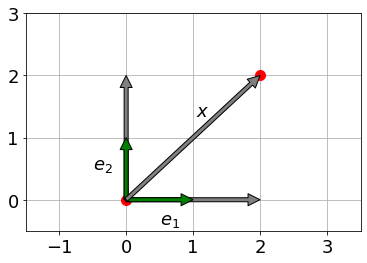

In [31]:
# 좌표 - 벡터의 좌표는 기저벡터를 선형조합하여 그 벡터를 나타내기 위한 계수벡터를 의미함
# x= x1e1+x2e2 이면 np.array([x1,x2])는 좌표(벡터)라고 함
# 위는 표준기저벡터를 사용한 예시이고 만약 다른 기저벡터를 사용시 다른 좌표를 가짐
# = 하나의 벡터도 기저벡터에 따라 여러 좌표를 가질 수 있음
e1 = np.array([1, 0])
e2 = np.array([0, 1])
x = np.array([2, 2])

plt.annotate('', xy=2 * e1, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=2 * e2, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=e1, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=e2, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=x, xytext=(0, 0), arrowprops=gray)

plt.plot(0, 0, 'ro', ms=10)
plt.plot(x[0], x[1], 'ro', ms=10)

plt.text(1.05, 1.35, "$x$", fontdict={"size": 18})
plt.text(-0.5, 0.5, "$e_2$", fontdict={"size": 18})
plt.text(0.5, -0.4, "$e_1$", fontdict={"size": 18})

plt.xticks(np.arange(-2, 4))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.5, 3.5)
plt.ylim(-0.5, 3)
plt.grid(True)
plt.show()
# 이 경우 좌표는 np.array([2,2])가 되지만 아래를 보면

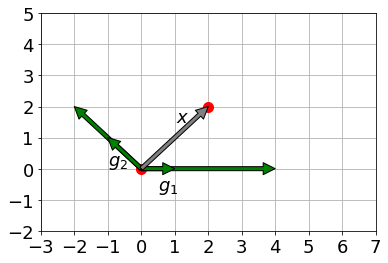

In [32]:
g1 = np.array([1, 0])
g2 = np.array([-1, 1])
x = np.array([2, 2])

plt.annotate('', xy=4 * g1, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=2 * g2, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=g1, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=g2, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=x, xytext=(0, 0), arrowprops=gray)

plt.plot(0, 0, 'ro', ms=10)
plt.plot(x[0], x[1], 'ro', ms=10)

plt.text(1.05, 1.5, "$x$", fontdict={"size": 18})
plt.text(-1, 0.1, "$g_2$", fontdict={"size": 18})
plt.text(0.5, -0.7, "$g_1$", fontdict={"size": 18})

plt.xticks(np.arange(-10, 10))
plt.yticks(np.arange(-10, 10))
plt.xlim(-3, 7)
plt.ylim(-2, 5)
plt.grid(True)
plt.show()
# 이 경우에 좌표는 np.array([4,2])가 된다.

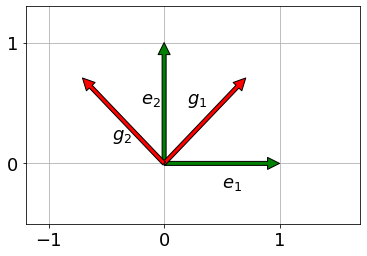

In [33]:
# 변환행렬
# 원래의 기저벡터 e1,e2 새로운 기저벡터 g1,g2일때 새로운 기저벡터들의 기존 기저벡터에 대한 좌표를
# 열벡터로 보고 이를 행렬로 묶은 행렬 A가 있다 생각해보면
# ex)
#   g1= e1*(1/sqrt(2)) + e2*(1/sqrt(2)), g2= e1*(-1/sqrt(2)) + e2*(1/sqrt(2))
#   e1,e2에 대한 g1,g2의 좌표는 
#   g1_e=np.array([(1/sqrt(2)),(1/sqrt(2))]), g2_e=np.array([-(1/sqrt(2)),(1/sqrt(2))])
#   행렬 A = np.array([g1_e,g2_e])
e1 = np.array([1, 0])
e2 = np.array([0, 1])
a = np.array([2, 2])
g1 = np.array([1, 1]) / np.sqrt(2)
g2 = np.array([-1, 1]) / np.sqrt(2)

plt.annotate('', xy=e1, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=e2, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=g1, xytext=(0, 0), arrowprops=red)
plt.annotate('', xy=g2, xytext=(0, 0), arrowprops=red)

plt.text(-0.2, 0.5, "$e_2$", fontdict={"size": 18})
plt.text(0.5, -0.2, "$e_1$", fontdict={"size": 18})
plt.text(0.2, 0.5, "$g_1$", fontdict={"size": 18})
plt.text(-0.45, 0.2, "$g_2$", fontdict={"size": 18})

plt.xticks(np.arange(-2, 4))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.2, 1.7)
plt.ylim(-0.5, 1.3)
plt.grid(True)
plt.show()

# 좌표변환 - 새로운 기저벡터에 대해 좌표를 계산하는 것
# x = [e_1 e_2]@x_e = [g_1 g_2]@x_g 이고 위에서 보았듯이 [g_1 g_2] = [e_1 e_2]A 이므로
# = [e_1 e_2]@A@x_g 
# 즉 x_e = A@x_g > A**-1 @ x_e = x_g = T@x_e 여기서 T( = A**-1)를 변환행렬이라함
# 쉽게 말해 새로운 좌표벡터는 원래의 좌표벡터에 변환행렬을 곱하면 됨

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missi

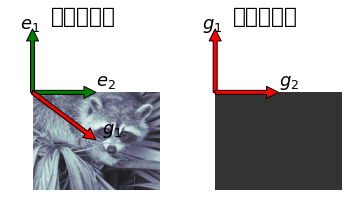

In [34]:
# 이미지 변환 - 좌표변환의 응용
# affine_transform()사용, 인수로 이미지와 변환행렬의 역행렬(=A)을 받음
# 단 파이썬에서는 기존 벡터로 e1 = (0,-1), e2=(1,0)을 사용함.
import scipy as sp
import scipy.misc
import scipy.ndimage


f = sp.misc.face(gray=True)

e1 = np.array([0, -1]) # matplotlib의 이미지 좌표규약으로 부호변경 
e2 = np.array([1, 0])
E = np.vstack([e1, e2]).T
g1 = np.array([-0.75,1])
g2 = np.array([-0.75,-1])
A = A=np.vstack([np.array([-0.75,1]),np.array([-0.75,-1])]).T
gc1 = E @ g1
gc2 = E @ g2

plt.subplot(121)
plt.imshow(f, cmap=plt.cm.bone, alpha=0.9)
plt.annotate('', xy=500*e1, xytext=(0,0), arrowprops=green)
plt.annotate('$e_1$', xy=500*e1, xytext=500*e1 + [-100,0])
plt.annotate('', xy=500*e2, xytext=(0,0), arrowprops=green)
plt.annotate('$e_2$', xy=500*e2, xytext=500*e2 + [0, -50])
plt.annotate('', xy=500*gc1, xytext=(0, 0), arrowprops=red)
plt.annotate('$g_1$', xy=500*gc1, xytext=500*gc1 + [50, -50])
plt.annotate('', xy=500*gc2, xytext=(0, 0), arrowprops=red)
plt.annotate('$g_2$', xy=500*gc2, xytext=500*gc2 + [50, 0])
plt.axis("off")
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title("좌표변환전")

f1 = sp.ndimage.affine_transform(f, A)

plt.subplot(122)
plt.imshow(f1, cmap=plt.cm.bone, alpha=0.8)
plt.annotate('', xy=500*e1, xytext=(0,0), arrowprops=red)
plt.annotate('$g_1$', xy=500*e1, xytext=500*e1 + [-100,0])
plt.annotate('', xy=500*e2, xytext=(0,0), arrowprops=red)
plt.annotate('$g_2$', xy=500*e2, xytext=500*e2 + [0, -50])
plt.axis("off")
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title("좌표변환후")
plt.show()



In [35]:
A=np.vstack([np.array([-0.75,1]),np.array([-0.75,-1])]).T
A


array([[-0.75, -0.75],
       [ 1.  , -1.  ]])

### 고윳값 분해

In [36]:
# 고윳값과 고유벡터
# Av=lv (영벡터가 아닌 v 실수 l(람다)) > 람다 = 고윳값, v = 고유벡터
# 행렬A의 고유벡터 = 행렬A를 곱해도 방향이 바뀌지 않는 벡터
# 고윳값 = 변환된 고유벡터와 원래 고유벡터의 크기비율
# Av=lv > (A-lI)v=0

# 고윳값과 고유벡터의 성질
# 어떤 벡터 v가 고유벡터가 되면 v의 스칼라곱인 벡터는 모두 고유벡터가 된다.
# 따라서 고유벡터를 표시할때 보통 정규화(norm으로 나눠 길이1로 만듬)를 거쳐 표현한다.

# 특성방정식 - 고윳값 계산 > 고유값을 알면 고유벡터도 구할 수 있음
# A의 고유값 = det(A-lI)=0 을 만족하는 해
# 만약 N차 방정식에서 중복되어 나오는 고유값이 있으면 이를 중복고윳값이라 함
# 실수해가 없는 경우도 있음 -  복소수를 가지는경우

# 고유값의 개수 - 중복된 고유값을 각각 별개로 생각 시 N차원 정방행렬의 고유값은 항상 N개

# 고윳값과 대각합/행렬식
# 어떤 행렬의 고윳값이 l1,l2,...,ln이라하면 
# det(A)=∏i=1~n λi , tr(A)=∑i=1~N λi = 대각합 이다.

In [37]:
# np를 사용한 고유분해 - np.linalg.eig()사용
#   고윳값은 벡터로, 고유벡터는 행렬형으로 나옴, 고유벡터는 정규화 되어 나온다.
#   결과값인 고유벡터 행렬은 열을 고유벡터로 출력함. 햇갈릴 수 있으니 조심
import numpy as np
A=np.array([[1,-2],[2,-3]])
w1,v1 = np.linalg.eig(A)
print(w1) # 고유값 벡터
print(v1) # 고유벡터 행렬


[-0.99999998 -1.00000002]
[[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


In [38]:
# 대각화
# 행렬 A를 고윳값과 고유벡터로 분해하여 행렬을 만들면
# 고유벡터행렬V = 고유벡터 열을 옆으로 쌓아 만듬
# 고윳값행렬Λ = 고윳값을 대각성분으로 가지는 대각행렬 = e1λ1+e2λ2+...enλn
# 위와 같이 정의시 AV=VΛ가 성립. 이를이용해 V의 역행렬이 존재시 A=VΛ(V**-1)을 대각화라고 함.

# 대각화가능
# 행렬이 대각화가능 하려면 고유벡터가 선형독립이여야 한다. = 역행렬이 존재하면
# 대각화가능행렬에 0인 고유값이 없으면 항상 역행렬이 존재.

In [39]:
# 대칭행렬의 고유분해
# 행렬 A가 실수인 대칭행렬이면 고유값이 실수이고 고유벡터는 서로 직교한다.(전치행렬이 곧 역행렬)
#   = 실수인 대칭행렬은 항상 대각화 가능하다.
# V.TV=VV.T=I, V**-1 = V.T > A=VΛV.T

# 대칭행렬을 랭크-1행렬의 합으로 분해
# A=VΛV.T (V=[v1 v2 ... vn])  = [l1v1 l2v2 ... lnvn]@V.T
# A = A1l1+A2l2+...+Anln (An은 an으로 만든 랭크-1행렬)
A = np.array([[60., 30., 20.],
              [30., 20., 15.],
              [20., 15., 12.]])
w, V = np.linalg.eig(A)
w1, w2, w3 = w # 고유값 벡터에서 고유값 뽑아냄 w1=l1 사실상 스칼라
v1 = V[:, 0:1] # 3개의 고유벡터
v2 = V[:, 1:2]
v3 = V[:, 2:3]
A1 = v1 @ v1.T # 3개의 랭크-1행렬
A2 = v2 @ v2.T
A3 = v3 @ v3.T
# A = w1*A1 + w2*A2 + w3*A3 이러면 사실상 블록행렬의 norm**2 * l 을 합한다는 소리.
# 역행렬 계산도 마찬가지로 가능함(0인 고유값이 없으면)
#   A**-1 =A1/l1 + A2/l2 + ... + An/ln

# 대칭행렬의 고윳값 부호
# 대칭행렬이 양의 정부호이면 고윳값은 모두 양수(역도 성립)
# 대칭행렬이 양의 준정부호이면 고윳값은 모두 0이거나 양수(역도 성립)

In [40]:
# 분산행렬 - 임의의 실수행렬X에대해 X.TX인 정방행렬
# 분산행렬은 양의 준정부호이고 고윳값은 0보다 크거나 같다.
# 영벡터가아닌 임의의 벡터x에 대해 분산행렬 이차형식을 구하면
# x.T(X.TX)x = (Xx).T(Xx)이므로 사실상 다른 벡터의 제곱합 형태(u.Tu)가 되어 >=0 이 된다.

# 분산행렬의 역행렬
# 행렬 X가 풀랭크이면 이 행렬의 분산행렬X.TX의 역행렬이 존재한다.
# 풀랭크라는 뜻은 X의 열벡터가 기저벡터라는 뜻. 따라서 모든 벡터 v에 대해 Xv=u는 영벡터가 될 수 없음
# 따라서 분산행렬은 양의 정부호이고 역행렬이 존재함

In [41]:
# 고유분해의 성질 - 앞선 내용 정리
# N차원 정방행렬 A에 대해
#   행렬 A는 N개의 고윳값-고유벡터를 가진다.(중복과 복소수 포함)
#   행렬의 대각합은 고윳값의 합, 행렬식은 고윳값의 곱
#   행렬 A가 대칭행렬이면 N개의 실수 고윳값을 가지며 고유벡터들이 서로 직교(costheta가 0)
#   행렬 A가 대칭행렬이고 고윳값이 모두 양수면 양의 정부호이고 역행렬이 존재
#   행렬 A가 어떤 행렬 X의 분산행렬(X.TX)이면 0또는 양의 고윳값을 가짐
#   행렬 X가 풀랭크이면 분산행렬의 역행렬이 존재

### 특잇값 분해

In [42]:
# 특잇값과 특이벡터
# N,M 크기의 행렬A를 A=UΣV.T의 3개의행렬곱으로 나타낸것을 특이분해라고 함
# 여기서 U,Σ,V 는 다음 조건을 만족함
#   대각성분이 양수인 대각행렬이며 큰 수부터 작은 수 순서로 배열
#   U는 N차원 정방행렬로 모든 열벡터가 단위벡터이고 서로 직교
#   V는 M차원 정방행렬로 모든 열벡터가 단위벡터이고 서로 직교
# 위 조건을 만족하는 Σ의 대각성분을 특잇값, 
# U의 열벡터들을 왼쪽 특이벡터, V의 행벡터들을 오른쪽 특이벡터라고 함

# 특이값 분해 행렬의 크기
# Σ의 크기가 N,M이니 대각성분인 특잇값의 개수는 min(N,M)이 됨

# 특이값 분해의 축소형
# 특이값 대각행렬(Σ)에서 0인 부분은 사실상 아무 의미없어 
# 0원소 부분과 이에 대응하는 왼쪽(혹은 오른쪽) 특이벡터를 없애고 축소형태로 계산해도 됨. 
# N>M 인경우 왼쪽 특이벡터에서 u_m+1~u_n을지움
# N<M 인경우 오른쪽 특이벡터에서 u_n+1~u_m을 지움

# 파이썬을 이용한 특이분해
from numpy.linalg import svd
A=np.array([[3,-1],[1,3],[1,1]])
U,S,VT=svd(A) # 왼쪽특이행렬 특이값대각행렬 오른쪽특이행렬 - 오른쪽특이행렬은 전치행렬로 출력됨
# 축소형의 경우는 svd(A, full_matrices=False)사용
np.diag(S,1) # S 원소를 대각화
VT

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [43]:
# 특잇값과 특이벡터의 관계
# 행렬 V는 정규직교행렬이므로 전치행렬 = 역행렬
# 특이분해 등식의 양변에 V를 곱하면 AV = USV.TV = US

# 특이분해와 고유분해의 관계
# 행렬 A의 분산행렬 A.TA=(V*S.T*U.T)(U*S*V.T) = V*Λ*V.T  - 근데 U.TU는 왜 고려안함??
# 따라서 특이값의 제곱은 A.TA의 고유값, A의 오른쪽 특이벡터는 고유벡터가 됨.

In [44]:
A=np.array([[3,-1],[1,3],[1,1]]); ATA= A.T @ A
from numpy.linalg import svd
A_U, A_S, A_VT = svd(A,full_matrices=True)
ATA_w, ATA_v = np.linalg.eig(ATA)
ATA_v, A_VT.T



(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([[-0.70710678,  0.70710678],
        [-0.70710678, -0.70710678]]))

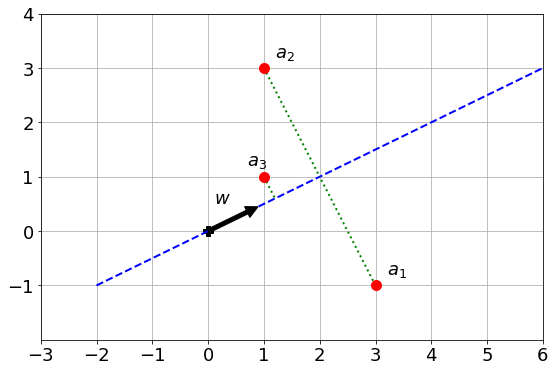

In [45]:
# 1차원 근사 -아래와 같이 원점을 지나면서 모든 점들과 가까이 있는 직선을 만드는것
import matplotlib.pyplot as plt
w = np.array([2, 1]) / np.sqrt(5) # 직선의 방향을 나타내는 단위벡터
a1 = np.array([3, -1])
a2 = np.array([1, 3])
a3 = np.array([1, 1])
black = {"facecolor": "black"}
plt.figure(figsize=(9, 6))
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=black)
plt.plot([-2, 8], [-1, 4], 'b--', lw=2) # x 벡터 -2 > 8, y벡터 -1 > 4
plt.plot([a1[0], 2], [a1[1], 1], 'g:', lw=2)
plt.plot([a2[0], 2], [a2[1], 1], 'g:', lw=2)
plt.plot([a3[0], 1.2], [a3[1], 0.6], 'g:', lw=2)
plt.plot(a1[0], a1[1], 'ro', ms=10)
plt.plot(a2[0], a2[1], 'ro', ms=10)
plt.plot(a3[0], a3[1], 'ro', ms=10)
plt.text(0.1, 0.5, "$w$")
plt.text(a1[0] + 0.2, a1[1] + 0.2, "$a_1$")
plt.text(a2[0] + 0.2, a2[1] + 0.2, "$a_2$")
plt.text(a3[0] - 0.3, a3[1] + 0.2, "$a_3$")
plt.xticks(np.arange(-3, 15)); plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 6); plt.ylim(-2, 4)
plt.grid(True)
plt.show()
# 벡터 w 와 점 ai의 거리의 제곱은 
# ∥(a_i)**⊥w∥**2=∥ai∥**2 −∥(a_i)**∥w∥**2=∥a_i∥**2 −(a_i.Tw)**2
# a_i가 점이기 때문에 이렇게 되는건가?
# 여기서 a_i를 행으로 갖는 행렬 A가 있으면 > 행벡터 놈의 제곱합 = 행렬의 놈
# 따라서 모든 점들과의 거리의 제곱의 합 = 행렬의 놈
# ∑i=1~3∥(a_i)**⊥w∥**2= ∑i=1~3∥a_i∥**2 −∑i=1~3(a_i.Tw)2
# 점 a_i의 위치가 고정되어있으므로 norm(A)는 고정. 따라서 norm(Aw)^2이 가장 큰 w를 찾아야 함
# == argmaxnorm(Aw)^2

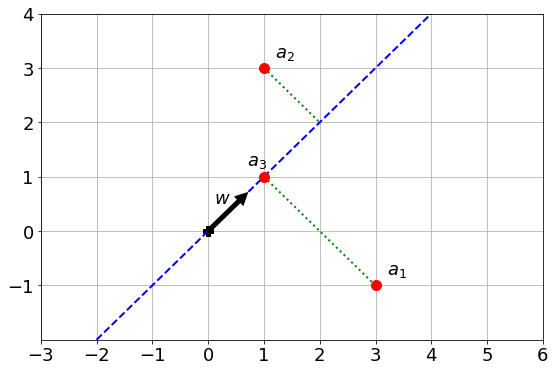

In [46]:
# 1차원 근사의 풀이
# A∈R3×2를 특이분해하면 
# 첫 번째 특잇값: σ1, 첫 번째 왼쪽 특이벡터 u1∈R^3, 첫 번째 오른쪽 특이벡터 v1∈R^2
# 두 번째 특잇값: σ2, 두 번째 왼쪽 특이벡터 u2∈R^3, 두 번째 오른쪽 특이벡터 v2∈R^2
# σ1 >= σ2, Av_i = s_i*u_i
# norm(Aw)를 가장 크게만드는 w찾기 - w를 v1,v2의 선형조합으로 나타냄 = w = w1v1+w2v2
# 여기서 w1^2+w2^2=1을 만족시켜야함
# norm(Aw)^2=norm(w1Av1+w2Av2)^2=norm(w1s1v1+w2s2v2)^2=norm(w1s1v1)^2+norm(w2s2v2)^2
# = (w1s1)^2*norm(u1)^2 + (w2s2)^2*norm(u2)^2 u1,u2는 단위벡터이므로 = (w1s1)^2+(w2s2)^2
# > 따라서 w1=1,w2=0 > w=v1 > norm(Aw)=norm(Av1)=norm(s1w1)=s1
w = np.array([1, 1]) / np.sqrt(2)
a1 = np.array([3, -1])
a2 = np.array([1, 3])
a3 = np.array([1, 1])

black = {"facecolor": "black"}

plt.figure(figsize=(9, 6))
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=black)
plt.plot([-2, 4], [-2, 4], 'b--', lw=2)
plt.plot([a1[0], 1], [a1[1], 1], 'g:', lw=2)
plt.plot([a2[0], 2], [a2[1], 2], 'g:', lw=2)
plt.plot(a1[0], a1[1], 'ro', ms=10)
plt.plot(a2[0], a2[1], 'ro', ms=10)
plt.plot(a3[0], a3[1], 'ro', ms=10)
plt.text(0.1, 0.5, "$w$")
plt.text(a1[0] + 0.2, a1[1] + 0.2, "$a_1$")
plt.text(a2[0] + 0.2, a2[1] + 0.2, "$a_2$")
plt.text(a3[0] - 0.3, a3[1] + 0.2, "$a_3$")
plt.xticks(np.arange(-3, 15)); plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 6); plt.ylim(-2, 4); plt.grid(True)
plt.show()
# 이때의 거리의 제곱합은 norm(A)^2 - s1^2 이됨.

In [47]:
# 근사의 일반적 풀이
# argmax∥Aw∥^2=argmax∑i=1~M((σ_i)^2*∥v_i.T*w∥^2
# 이 값을 가장 크게 하려면 w를 가장 큰 특잇값에 대응하는 오른쪽 고유벡터 v_1으로 해야함

# 랭크-1 근사문제
# a_i를 w에 투영한 벡터는 (a_i.Tw)w 이므로 
# w를 이용해 N개의 M차원 벡터 a1,a2,..,an을 
# 1차원으로 투영해 a_1^∥w,a_2^∥w,..,a_n^∥w을 만들 수 있음 A′=Aww.T
# 이 답은 원래 행렬A에 ww.T를 곱해 A와 가장 비슷한 행렬 A′를 만드는 문제와 같음
# argmin∥A−A′∥=argmin∥A−Aww.T∥

# k차원 근사와 랭크-K근사 문제는 위 내용 더 숙지하고 한 번 보기로함

### PCA

In [48]:
# PCA = 주성분분석(데이터간의 변이 규칙을 찾아내는 방법)
#   고차원 데이터집합이 주어질때 
#   원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 방법
#    = 차원축소 라고도 함 > 더 낮은 차원의 데이터값 변화가 더 높은 차원의 데이터값 변화를 설명가능

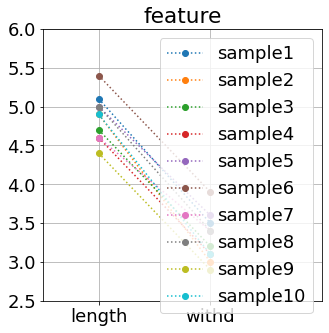

In [49]:
# 붓꽃 데이터의 차원축소
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris=load_iris()
N=10
X=iris.data[:N,:2] #꽃받침 길이와 꽃받침 폭만 선택
plt.figure(figsize=(5,5))
plt.plot(X.T,'o:')
plt.xticks([0,1],["length", "withd"])
plt.xlim(-0.5,2); plt.ylim(2.5,6)
plt.title('feature')
plt.legend(['sample{}'.format(i+1) for i in range(N)])
plt.grid(True); plt.show()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


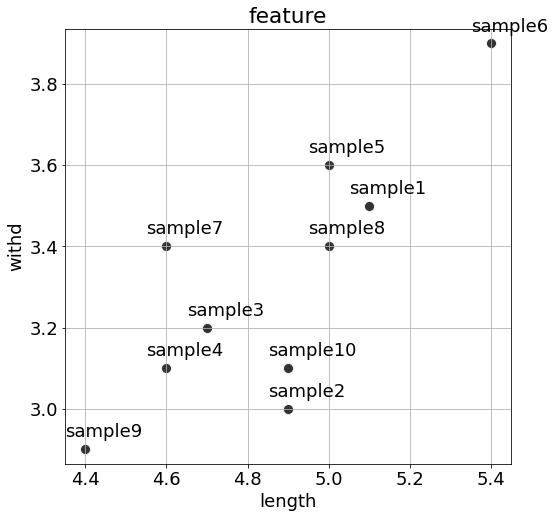

In [50]:
# 위 그래프의 산점도 버전
import seaborn as sns
import pandas as pd
plt.figure(figsize=(8,8))
ax=sns.scatterplot(0,1,data=pd.DataFrame(X),s=100,color='.2',marker='o')
for i in range(N):
    ax.text(X[i,0]-0.05,X[i,1]+0.03,'sample{}'.format(i+1))
plt.xlabel('length'); plt.ylabel('withd'); plt.title('feature')
plt.axis('equal'); plt.grid(True); plt.show()

# 잠재변수 = 바로 측정되지는 않지만 측정된 데이터의 기저에 숨어 측정 데이터를 결정짓는 데이터
# PCA는 잠재변수와 측정 데이터가 선형관계로 연결되어 있다고 가정함.
#   = i번째 표본의 측정 데이터 벡터 xi의 각 원소를 조합시 잠재변수 ui 계산가능하다 가정
# u_i=w.T*x_i (w는 가중치벡터)
# 위의 예시에서는 u_i=w_1*x_(i,1)+w_2*x_(i,2)로 나타낼 수 있음

In [51]:
# 차원축소와 투영 = 로우-랭크 근사 문제가 됨 다만 성능을 위해 직선이 원점을 지난다는 조건 삭제
# N개의 M차원 데이터 벡터 x1,..,xn에 대해 어떤 상수 벡터 x0를 뺀 데이터벡터 x1-x0,..,xn-x0를
# 정규직교인 기저벡터 w1,..,wk로 이루어진 K차원 벡터공간으로 투영하여 가장 비슷한 N개의 K차원 벡터
# x1^∥w,...,xn^∥w를 만들기 위한 정규직교 기저벡터 w와 상수벡터 x0을 찾는다.
#   - 원점이 아닌 점 x0을 지나는 직선을 찾는 문제가 됨
#   - x0 = x1,..,xn의 평균벡터 | w1,..,wk는 가장 큰 K개의 특잇값에 대응하는 오른쪽 특이벡터.

In [52]:
# PCA의 수학적 설명


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


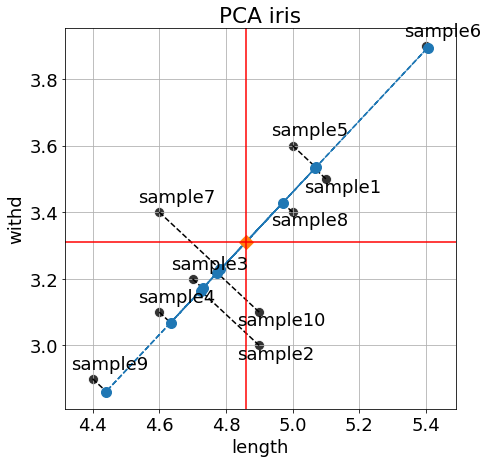

array([-0.68305029, -0.73037134])

In [53]:
# 사이킷런의 PCA 기능
# 입력 n_components=정수
# 메서드 fit_transform() 특징행렬을 낮은 차원의 근사행렬로 변환
#       inverse_transform() 변환된 근사행렬을 원래 차원으로 복귀
# 속성 mean_ 평균벡터, components_  주성분 벡터
from sklearn.decomposition import PCA
pca1=PCA(n_components=1)
X_low=pca1.fit_transform(X)
X2=pca1.inverse_transform(X_low)
plt.figure(figsize=(7,7))
ax=sns.scatterplot(0,1,data=pd.DataFrame(X),s=100,color='.2',marker='o') # X 산점도
for i in range(N):
    d = 0.03 if X[i,1] > X2[i,1] else -0.04 # 샘플이름 위치를 위한 d지정
    ax.text(X[i,0]-0.065,X[i,1]+d, 'sample{}'.format(i+1)) # 샘플 이름 위치 지정
    plt.plot([X[i,0],X2[i,0]],[X[i,1],X2[i,1]],'k--') # X에서 X2로 이어지는 선 
plt.plot(X2[:,0],X2[:,1],'o--',ms=10) # X2 표기
plt.plot(X2[:,0].mean(),X2[:,1].mean(),ms=10,marker='D') # X2 전체 평균
plt.axvline(X[:,0].mean(),c='r'); plt.axhline(X[:,1].mean(),c='r') # X2 전체평균 x,y값 보이기
plt.xlabel('length'); plt.ylabel('withd'); plt.title('PCA iris') # 라벨,타이틀설정
plt.grid(True); plt.axis('equal'); plt.show()
pca1.mean_ # 데이터 평균값 (X2)
pca1.components_ # 주성분벡터 = 가장 근사 데이터를 만드는 단위기저벡터
                 #  - 평균을 제거한 특징행렬의 첫 번째 오른쪽 특이벡터
                 #  - 혹은 그 행렬의 분산행렬의 첫 번째 고유벡터 = 고유벡터의 부호는 반대가 될 수 있음
X0=X-X.mean(axis=0)
U,S,VT=np.linalg.svd(X0)
VT[:,0] # = pca1.components_

In [54]:
X2

array([[5.06676112, 3.53108532],
       [4.7240094 , 3.1645881 ],
       [4.73047393, 3.17150049],
       [4.63393012, 3.06826822],
       [5.06999338, 3.53454152],
       [5.40628057, 3.89412635],
       [4.78359423, 3.22830091],
       [4.97021731, 3.42785306],
       [4.44084251, 2.86180369],
       [4.77389743, 3.21793233]])

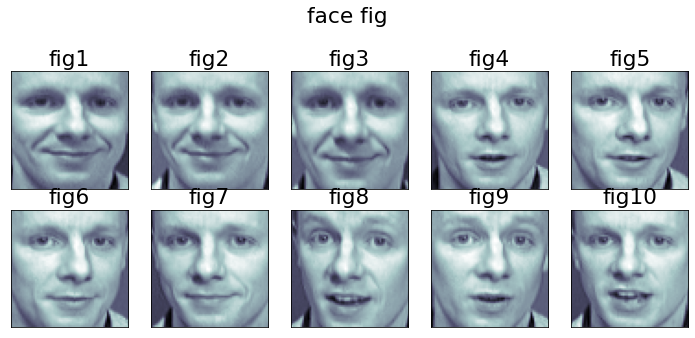

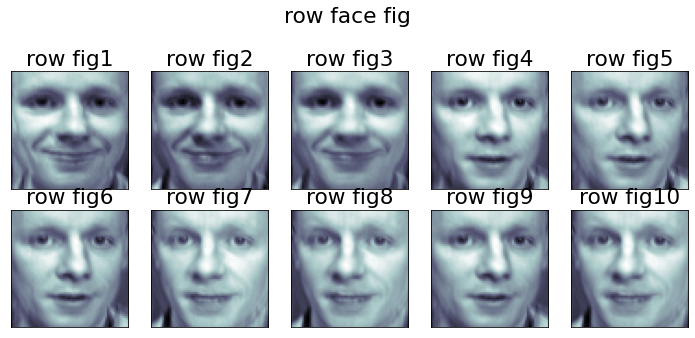

In [55]:
# 이미지 PCA
from sklearn.datasets import fetch_olivetti_faces
faces_all=fetch_olivetti_faces()
K=20
faces=faces_all.images[faces_all.target == K]
N=2; M=5
fig= plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0.3,wspace=0.05)
for i in range(N):
    for j in range(M):
        k=i*M+j
        ax=fig.add_subplot(N,M,k+1)
        ax.imshow(faces[k],cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([]); ax.yaxis.set_ticks([])
        plt.title('fig{}'.format(k+1))
plt.suptitle('face fig'); plt.tight_layout(); plt.show()

# 사진 근사화
pca3=PCA(n_components=2)
X3=faces_all.data[faces_all.target == K]
W3=pca3.fit_transform(X3); X32=pca3.inverse_transform(W3)
N=2; M=5
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0.3,wspace=0.05)
for i in range(N):
    for j in range(M):
        k=i*M + j
        ax=fig.add_subplot(N,M,k+1)
        ax.imshow(X32[k].reshape(64,64),cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([]); ax.yaxis.set_ticks([])
        plt.title('row fig{}'.format(k+1))
plt.suptitle('row face fig'); plt.tight_layout(); plt.show()

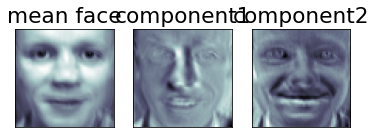

In [56]:
# 평균값과 2개의 주성분 나타내기
face_mean=pca3.mean_.reshape(64,64)
face_p1=pca3.components_[0].reshape(64,64)
face_p2=pca3.components_[1].reshape(64,64)
plt.subplot(131)
plt.imshow(face_mean,cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('mean face')
plt.subplot(132)
plt.imshow(face_p1,cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('component1')
plt.subplot(133)
plt.imshow(face_p2,cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('component2')
plt.show()

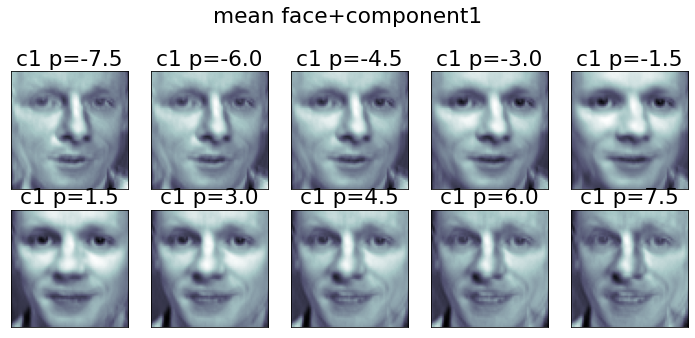

In [57]:
# 위를 바탕으로 평균얼굴에 주성분1을 더해보자
N=2; M=5
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0.3,wspace=0.05)
for i in range(N):
    for j in range(M):
        k=i*M+j
        ax=fig.add_subplot(N,M,k+1)
        w=1.5*(k-5) if k< 5 else 1.5*(k-4)
        ax.imshow(face_mean+w*face_p1,cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([]); ax.yaxis.set_ticks([])
        plt.title('c1 p={}'.format(w))
plt.suptitle('mean face+component1')
plt.tight_layout(); plt.show()
# 주성분2도 똑같이 진행하면 됨

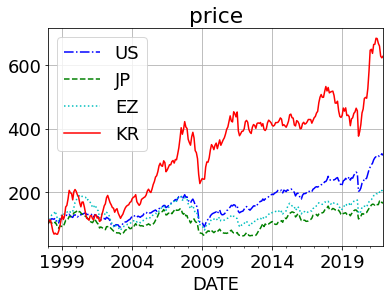

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375330  -21.857080  -30.647772
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


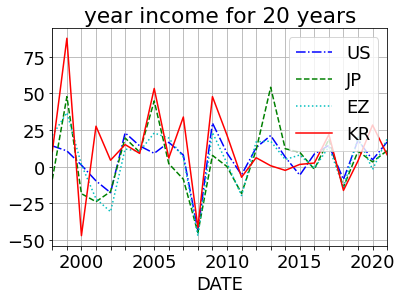

In [58]:
# 주식가격의 PCA 좋고 좋고
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
symbols=[
    'SPASTT01USM661N', # US
    'SPASTT01JPM661N', # JP
    "SPASTT01EZM661N", # EZ
    "SPASTT01KRM661N"] # KR
data=pd.DataFrame()
for sym in symbols:
    data[sym]=web.DataReader(sym,data_source='fred',
                             start=datetime.datetime(1998, 1, 1),
                             end=datetime.datetime(2021, 12, 31))[sym]
data.columns=['US','JP','EZ','KR']
data = data/data.iloc[0]*100
styles=['b-.','g--','c:','r-']
data.plot(style=styles)
plt.title('price'); plt.grid(True); plt.show()

# 연간 수익률 데이터(특징행렬)
df=((data.pct_change()+1).resample("A").prod()-1).T*100
print(df.iloc[:,:5])
# 연간 수익률 그래프
df.T.plot(style=styles)
plt.title('year income for 20 years')
plt.xticks(df.columns); plt.grid(True); plt.show()

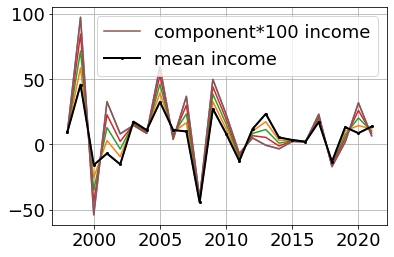

    component weight
US        -34.134498
JP        -20.550492
EZ        -29.675427
KR         84.360417


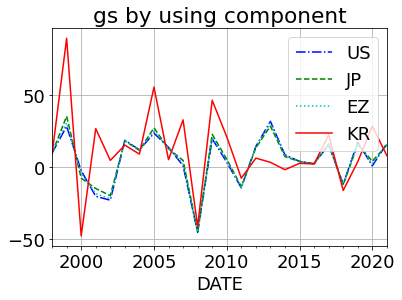

In [59]:
# 기저 성분을 살펴보자
import numpy as np
pca2=PCA(n_components=1)
w=pca2.fit_transform(df)
m=pca2.mean_
p1=pca2.components_[0]
xrange=np.linspace(1998,2021,24,dtype=int)
for i in np.linspace(0,100,5):
    plt.plot(xrange,pca2.mean_ + p1*i)
plt.plot(xrange,pca2.mean_+p1*100,label='component*100 income')
plt.plot(xrange,pca2.mean_,'ko-',ms=2,lw=2,label='mean income')
plt.legend(); plt.grid(True); plt.show()

# 주성분의 의미 알기
df_w=pd.DataFrame(w)
df_w.index = df.index
df_w.columns=['component weight']
print(df_w)
# 주성분을 이용한 근사 주가
df_i=pd.DataFrame(pca2.inverse_transform(w))
df_i.index=df.index
df_i.columns=df.columns
df_i.iloc[:,-10:]
df_i.T.plot(style=styles)
plt.title('gs by using component')
plt.grid(True); plt.show() # 결과로부터 주성분은 미국,일본,유럽 에서 
                           # 한국 이라는 데이터로 변화시키는 요인, 즉 중진국 요인이라 할 수 있음